### 2.1: 1NN algorithm for 2dim data

In [1]:
# load data and packages
import numpy as np

filepath = r"C:\Users\Nicor\OneDrive\Documents\Sem 9\ECE 760\HW3\hw3Data-3\hw3Data\D2z.txt"

# Use numpy.genfromtxt to read the file into a NumPy array
training_data = np.genfromtxt(filepath, dtype=float)

In [3]:
# 1NN algorithm
def distance(point1, point2):
    # returns the euclidean distance between [x11,x12] and [x21,x22]
    return np.linalg.norm(point1 - point2)

def knn(point, data):
    """ 
    Parameters:
        point: np.array([0.113, 0.442])
            a new point to classify
        data: np.array([[x01,x02,y0],[x11,x12,y1],[x21,x22,y3],...])
            classified training data
    Returns:
        int: the predicted class for point
     """
    # find all the distances from point to each data point
    data_points = data[:,0:-1]
    distances = []
    for i in range(len(data)):
        distances.append(distance(point, data_points[i]))

    # return the class of the closest point
    index_of_max = int(np.argmin(distances))
    closest_neighbor = data[index_of_max]
    predicted_class = int(closest_neighbor[-1])

    return predicted_class

#### Plotting grid of test data

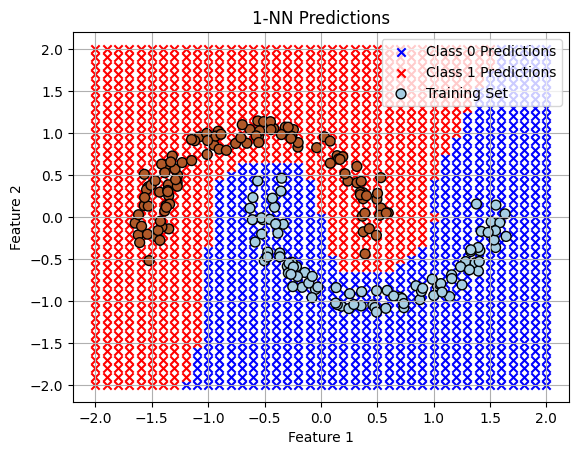

In [5]:
import matplotlib.pyplot as plt

# Generate the grid of test points
x_values = np.arange(-2, 2.1, 0.1)
y_values = np.arange(-2, 2.1, 0.1)
test_points = np.array([[x, y] for x in x_values for y in y_values])

# Make predictions for the test points
predictions = [knn(point, training_data) for point in test_points]

# Separate the test points into two lists: one for each class
class_0_points = [point for point, prediction in zip(test_points, predictions) if prediction == 0]
class_1_points = [point for point, prediction in zip(test_points, predictions) if prediction == 1]

# Plot the test points with predictions
plt.scatter([point[0] for point in class_0_points], [point[1] for point in class_0_points], c='blue', marker='x', label='Class 0 Predictions')
plt.scatter([point[0] for point in class_1_points], [point[1] for point in class_1_points], c='red', marker='x', label='Class 1 Predictions')

# Plot the training 
plt.scatter(training_data[:, 0], training_data[:, 1], c=training_data[:, 2], cmap=plt.cm.Paired, s=50, edgecolors='black', marker='o', label='Training Set')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('1-NN Predictions')
plt.legend()
plt.grid(True)
plt.show()


### 2.2: 5-fold cross validation

In [4]:
# read in data into np array 
import csv
import numpy as np
filepath = r"C:\Users\Nicor\OneDrive\Documents\Sem 9\ECE 760\HW3\hw3Data-3\hw3Data\emails.csv"

data_rows = []
labels = []

# Open the CSV file and read its contents
with open(filepath, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Read the labels from the first row
    labels = next(csv_reader)
    
    # Read the data rows
    for row in csv_reader:
        data_rows.append(row)

# Convert data rows to a NumPy array (assuming the data is numeric)
data_array = [row[1:] for row in data_rows]
data_array = np.array(data_array, dtype=float)

In [6]:
# run 5 folds of 1NN cross validation, report accuracy, precision, and recall in each fold. 
accuracy_scores = []
precision_scores = []
recall_scores = []

# Define the number of folds
num_folds = 5
fold_size = len(data_array) // num_folds

# Perform 5-fold cross-validation
for fold_idx in range(num_folds):
    # Define the indices for the current fold
    start_idx = fold_idx * fold_size
    end_idx = start_idx + fold_size
    
    # Split the data into training and test sets for the current fold
    train = np.vstack((data_array[:start_idx], data_array[end_idx:]))
    test = data_array[start_idx:end_idx]
    x_test = test[:,:-1]
    
    # Get predictions for test data
    y_pred = [knn(point, train) for point in x_test]
    y_pred = np.array(y_pred)

    # Calculate evaluation metrics for this fold
    y_test = test[:,-1]
    correct_predictions = np.sum(y_pred == y_test)
    accuracy = correct_predictions / len(y_test)
    
    # Calculate precision and recall
    true_positives = np.sum((y_pred == 1) & (y_test == 1))
    false_positives = np.sum((y_pred == 1) & (y_test == 0))
    false_negatives = np.sum((y_pred == 0) & (y_test == 1))
    
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    
    # Append the scores to the respective lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    
    # Print the metrics for this fold                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
    print(f"Fold {fold_idx + 1}: Accuracy = {accuracy}, Precision = {precision}, Recall = {recall}")

# Calculate and print the mean scores across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)

print("\nMean Scores Across All Folds:")
print(f"Mean Accuracy = {mean_accuracy}")
print(f"Mean Precision = {mean_precision}")
print(f"Mean Recall = {mean_recall}")

Fold 1: Accuracy = 0.825, Precision = 0.6544943820224719, Recall = 0.8175438596491228
Fold 2: Accuracy = 0.853, Precision = 0.6857142857142857, Recall = 0.8664259927797834
Fold 3: Accuracy = 0.862, Precision = 0.7212121212121212, Recall = 0.8380281690140845
Fold 4: Accuracy = 0.851, Precision = 0.7164179104477612, Recall = 0.8163265306122449
Fold 5: Accuracy = 0.775, Precision = 0.6057441253263708, Recall = 0.7581699346405228

Mean Scores Across All Folds:
Mean Accuracy = 0.8332
Mean Precision = 0.6767165649446021
Mean Recall = 0.8192988973391516
